Ml 중 sklearn을 사용하는 도중에 data preprocessing과 반복적인 코드, hyper parameter tuning으로 혼돈이 올 수 있다.\
이 과정을 간단하게 수행할 수 있도록 도와주는 것이 PipeLine이다.

In [16]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')
red_wine['color']=1.
white_wine['color']=0.
wine = pd.concat([red_wine, white_wine])
x = wine.drop(['color'], axis=1)
y = wine['color']

In [3]:
estimators = [('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]
pipe = Pipeline(estimators)

In [12]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, stratify=y)
pipe.fit(x_train, y_train)
y_pred_tr = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)
print('Train Acc    : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc     : ', accuracy_score(y_test, y_pred_test))

Train Acc    :  0.9998075812969021
Test Acc     :  0.9853846153846154


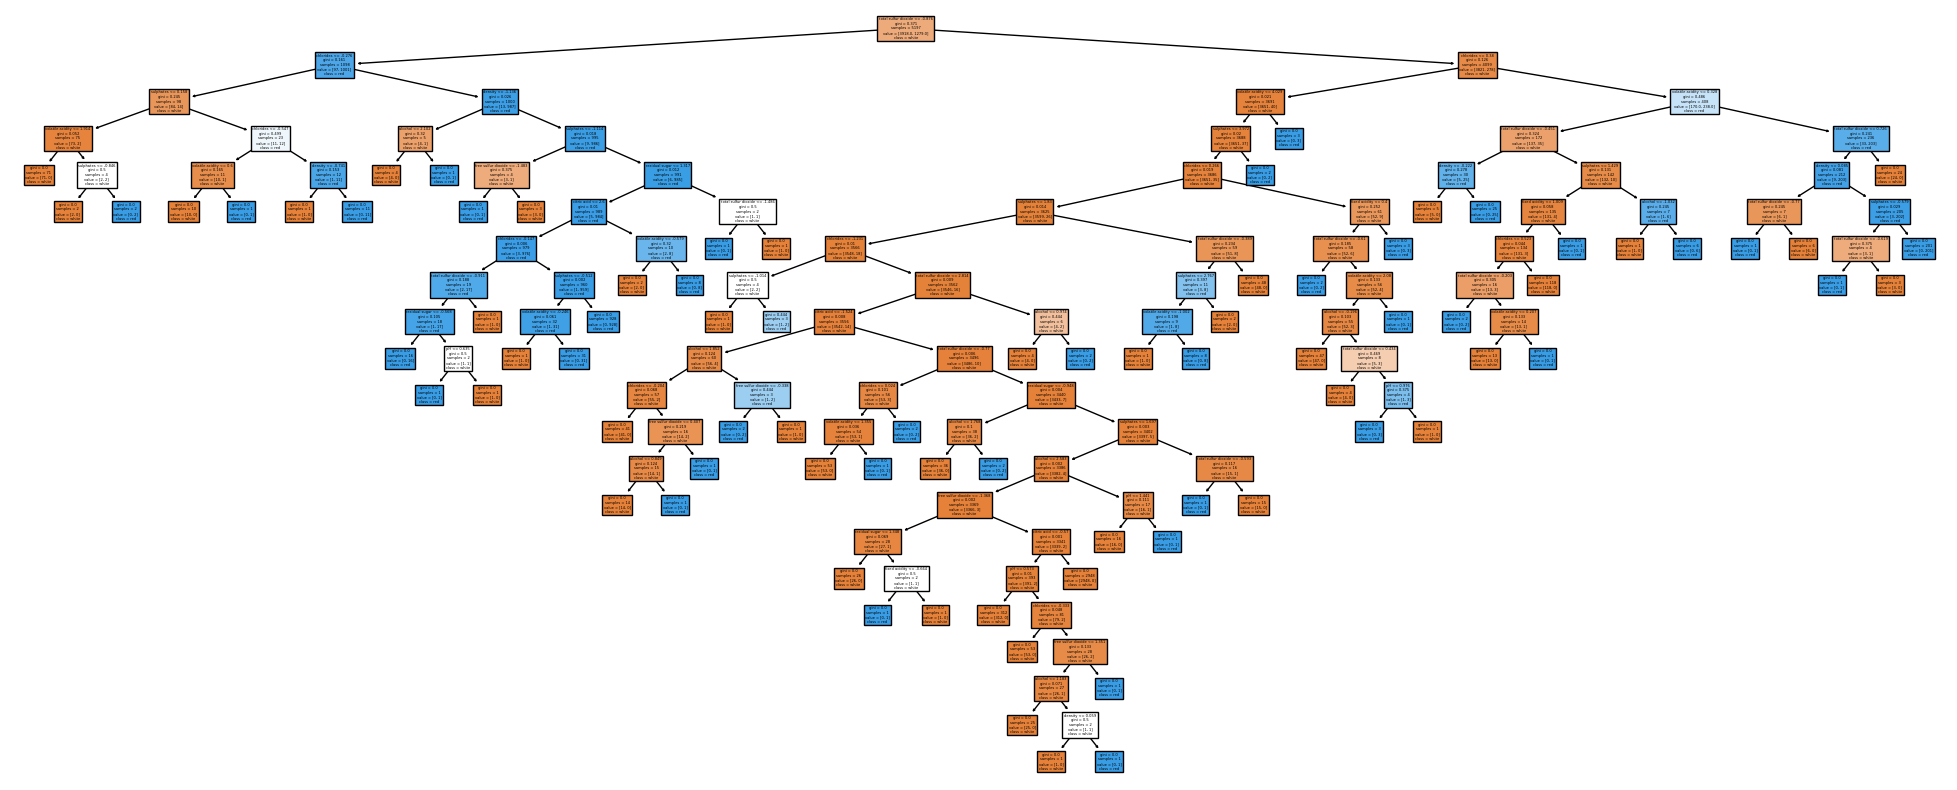

In [17]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(pipe['clf'], feature_names=x_train.columns, class_names =['white', 'red'], filled=True)